In [1]:
import pandas as pd
import numpy as np
import math
import operator
from collections import Counter

In [2]:
my_sheet = 'Sheet1'
file_name = '/home/nbuser/library/BlackFriday2.xlsx'
df = pd.read_excel(file_name, sheetname=my_sheet)
df.head()
df.shape
df["Product_Category_1"].fillna(0, inplace=True)
df["Product_Category_2"].fillna(0, inplace=True)
df["Product_Category_3"].fillna(0, inplace=True)
df.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


## Predicting Purchase based on various products bought

In [3]:
from sklearn.model_selection import train_test_split
x=df[["Product_Category_1",'Product_Category_2','Product_Category_3']]
y=df["Purchase"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.90,random_state = 42)
print(x.iloc[0,:])

Product_Category_1    3.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 0, dtype: float64


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
def knnpredict(x_train,x_test,y_train,k):
    final=[]
    diff=[]
    ma=[]
    for i in range(len(x_train)):
        dist=np.sqrt(np.sum(np.square(x_train.values[i]-x_test)))
        diff.append((dist,y_train.values[i]))
        
         
    x2=0       
    diff=sorted(diff,key=lambda x: x[0]) 
    for i in range(k):
        x2=x2+diff[i][1]
   
    return (x2/k)



## K value=4

In [5]:
f=len(y_test)
final=[]
for i in range(f):
    final.append(knnpredict(x_train,x_test.values[i,:],y_train,4))
    print("Prediction of Species based on test data-")
    print(x_test.iloc[i,:])
    print("is-",final[i]) 

Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    5.0
Product_Category_3    0.0
Name: 195, dtype: float64
is- 10159.5
Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    4.0
Product_Category_3    5.0
Name: 79, dtype: float64
is- 12075.5
Prediction of Species based on test data-
Product_Category_1     5.0
Product_Category_2     6.0
Product_Category_3    16.0
Name: 479, dtype: float64
is- 8600.5
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 109, dtype: float64
is- 5268.75
Prediction of Species based on test data-
Product_Category_1    8.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 473, dtype: float64
is- 6984.0
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 490, dtype: float64
is- 5268.75
Prediction of Species based on test data-
Product_Ca

Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 370, dtype: float64
is- 5268.75
Prediction of Species based on test data-
Product_Category_1    11.0
Product_Category_2    15.0
Product_Category_3     0.0
Name: 319, dtype: float64
is- 5185.5


In [6]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, final)
accuracy=accuracy*100
print("Accuracry(R2 value) is-  ",accuracy,'%')

Accuracry(R2 value) is-   54.78669008628299 %


## K value=5

In [7]:
f=len(y_test)
final=[]
for i in range(f):
    final.append(knnpredict(x_train,x_test.values[i,:],y_train,5))
    print("Prediction of Species based on test data-")
    print(x_test.iloc[i,:])
    print("is-",final[i]) 

Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    5.0
Product_Category_3    0.0
Name: 195, dtype: float64
is- 8543.4
Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    4.0
Product_Category_3    5.0
Name: 79, dtype: float64
is- 11778.8
Prediction of Species based on test data-
Product_Category_1     5.0
Product_Category_2     6.0
Product_Category_3    16.0
Name: 479, dtype: float64
is- 10141.6
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 109, dtype: float64
is- 5610.0
Prediction of Species based on test data-
Product_Category_1    8.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 473, dtype: float64
is- 6389.8
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 490, dtype: float64
is- 5610.0
Prediction of Species based on test data-
Product_Cate

Prediction of Species based on test data-
Product_Category_1    11.0
Product_Category_2    15.0
Product_Category_3     0.0
Name: 319, dtype: float64
is- 4498.8


In [8]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, final)
accuracy=accuracy*100
print("Accuracry(R2 value) is-  ",accuracy,'%')

Accuracry(R2 value) is-   53.71123588027395 %


## K value=7

In [9]:
f=len(y_test)
final=[]
for i in range(f):
    final.append(knnpredict(x_train,x_test.values[i,:],y_train,7))
    print("Prediction of Species based on test data-")
    print(x_test.iloc[i,:])
    print("is-",final[i]) 

Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    5.0
Product_Category_3    0.0
Name: 195, dtype: float64
is- 6718.0
Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    4.0
Product_Category_3    5.0
Name: 79, dtype: float64
is- 12618.857142857143
Prediction of Species based on test data-
Product_Category_1     5.0
Product_Category_2     6.0
Product_Category_3    16.0
Name: 479, dtype: float64
is- 8308.0
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 109, dtype: float64
is- 5737.428571428572
Prediction of Species based on test data-
Product_Category_1    8.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 473, dtype: float64
is- 6521.285714285715
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 490, dtype: float64
is- 5737.428571428572
Prediction 

Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    4.0
Product_Category_3    5.0
Name: 393, dtype: float64
is- 12618.857142857143
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 70, dtype: float64
is- 5737.428571428572
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 210, dtype: float64
is- 5737.428571428572
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 370, dtype: float64
is- 5737.428571428572
Prediction of Species based on test data-
Product_Category_1    11.0
Product_Category_2    15.0
Product_Category_3     0.0
Name: 319, dtype: float64
is- 6691.285714285715


In [11]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, final)
accuracy=accuracy*100
print("Accuracry(R2 value) is-  ",accuracy,'%')

Accuracry(R2 value) is-   52.170726746592734 %


## K value=9

In [12]:
f=len(y_test)
final=[]
for i in range(f):
    final.append(knnpredict(x_train,x_test.values[i,:],y_train,9))
    print("Prediction of Species based on test data-")
    print(x_test.iloc[i,:])
    print("is-",final[i])

Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    5.0
Product_Category_3    0.0
Name: 195, dtype: float64
is- 5475.888888888889
Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    4.0
Product_Category_3    5.0
Name: 79, dtype: float64
is- 12610.444444444445
Prediction of Species based on test data-
Product_Category_1     5.0
Product_Category_2     6.0
Product_Category_3    16.0
Name: 479, dtype: float64
is- 8027.0
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 109, dtype: float64
is- 5448.444444444444
Prediction of Species based on test data-
Product_Category_1    8.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 473, dtype: float64
is- 6441.0
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 490, dtype: float64
is- 5448.444444444444
Prediction 

Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    4.0
Product_Category_3    5.0
Name: 393, dtype: float64
is- 12610.444444444445
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 70, dtype: float64
is- 5448.444444444444
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 210, dtype: float64
is- 5448.444444444444
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 370, dtype: float64
is- 5448.444444444444
Prediction of Species based on test data-
Product_Category_1    11.0
Product_Category_2    15.0
Product_Category_3     0.0
Name: 319, dtype: float64
is- 8007.0


In [13]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, final)
accuracy=accuracy*100
print("Accuracry(R2 value) is-  ",accuracy,'%')

Accuracry(R2 value) is-   44.45600469143818 %


## K value=12

In [14]:
f=len(y_test)
final=[]
for i in range(f):
    final.append(knnpredict(x_train,x_test.values[i,:],y_train,12))
    print("Prediction of Species based on test data-")
    print(x_test.iloc[i,:])
    print("is-",final[i])

Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    5.0
Product_Category_3    0.0
Name: 195, dtype: float64
is- 6803.0
Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    4.0
Product_Category_3    5.0
Name: 79, dtype: float64
is- 12695.25
Prediction of Species based on test data-
Product_Category_1     5.0
Product_Category_2     6.0
Product_Category_3    16.0
Name: 479, dtype: float64
is- 7617.833333333333
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 109, dtype: float64
is- 5553.583333333333
Prediction of Species based on test data-
Product_Category_1    8.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 473, dtype: float64
is- 6514.5
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 490, dtype: float64
is- 5553.583333333333
Prediction of Species

Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 370, dtype: float64
is- 5553.583333333333
Prediction of Species based on test data-
Product_Category_1    11.0
Product_Category_2    15.0
Product_Category_3     0.0
Name: 319, dtype: float64
is- 6619.333333333333


In [15]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, final)
accuracy=accuracy*100
print("Accuracry(R2 value) is-  ",accuracy,'%')

Accuracry(R2 value) is-   48.13429277547978 %


## Calculation of RMSE

In [17]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

## Various RMSE calculated using my model of KNN Rgression

In [18]:
rmse=[]
for k in range(15):
    final=[]
    k = k+1
    for i in range(len(y_test)):
        final.append(knnpredict(x_train,x_test.values[i,:],y_train,k))
        
    er=sqrt(mean_squared_error(y_test,final))
    rmse.append(er)
    print('RMSE error for k value-',k,'is',er)
    accuracy = r2_score(y_test, final)
    accuracy=accuracy*100
    print('Accuracy for k= ' , k , 'is:', accuracy,'%')

RMSE error for k value- 1 is 5024.7478236135485
Accuracy for k=  1 is: 8.15271700958926 %
RMSE error for k value- 2 is 3949.8980671542768
Accuracy for k=  2 is: 43.24429163611008 %
RMSE error for k value- 3 is 3628.410394359904
Accuracy for k=  3 is: 52.107161560820934 %
RMSE error for k value- 4 is 3525.447605527301
Accuracy for k=  4 is: 54.78669008628299 %
RMSE error for k value- 5 is 3567.12975139295
Accuracy for k=  5 is: 53.71123588027395 %
RMSE error for k value- 6 is 3611.951457147214
Accuracy for k=  6 is: 52.540672271577435 %
RMSE error for k value- 7 is 3626.0017131473733
Accuracy for k=  7 is: 52.170726746592734 %
RMSE error for k value- 8 is 3762.8885118048247
Accuracy for k=  8 is: 48.49131362042941 %
RMSE error for k value- 9 is 3907.5061635787965
Accuracy for k=  9 is: 44.45600469143818 %
RMSE error for k value- 10 is 3931.3939307486435
Accuracy for k=  10 is: 43.774814385343085 %
RMSE error for k value- 11 is 3802.2624732785716
Accuracy for k=  11 is: 47.40772487859528

## Various RMSE calculated using my model of KNN Rgression but here using the same values for training as well as testing(i.e. X_train for both training and testing)

In [19]:
rmse1=[]
for k in range(15):
    final1=[]
    k = k+1
    for i in range(len(y_train)):
        final1.append(knnpredict(x_train,x_train.values[i,:],y_train,k))
        
    er1=sqrt(mean_squared_error(y_train,final1))
    rmse1.append(er)
    print('RMSE error for k value-',k,'is',er1)
    accuracy2 = r2_score(y_train, final1)
    accuracy2=accuracy2*100
    print('Accuracy for k= ' , k , 'is:', accuracy2,'%')

RMSE error for k value- 1 is 3502.104415641641
Accuracy for k=  1 is: 49.71005001355433 %
RMSE error for k value- 2 is 3242.335144891968
Accuracy for k=  2 is: 56.89389024515879 %
RMSE error for k value- 3 is 3151.3786016390027
Accuracy for k=  3 is: 59.27846069730751 %
RMSE error for k value- 4 is 3230.1013634745023
Accuracy for k=  4 is: 57.218567255501675 %
RMSE error for k value- 5 is 3265.05434217073
Accuracy for k=  5 is: 56.2876806490894 %
RMSE error for k value- 6 is 3326.595561594557
Accuracy for k=  6 is: 54.624332140204615 %
RMSE error for k value- 7 is 3362.140043481555
Accuracy for k=  7 is: 53.64947889845336 %
RMSE error for k value- 8 is 3404.2441011630826
Accuracy for k=  8 is: 52.48131541845078 %
RMSE error for k value- 9 is 3449.7753166644907
Accuracy for k=  9 is: 51.20170550025913 %
RMSE error for k value- 10 is 3475.3026915529213
Accuracy for k=  10 is: 50.47684597707445 %
RMSE error for k value- 11 is 3518.178376508927
Accuracy for k=  11 is: 49.24734890900263 %
R

##  Various RMSE calculated using built-in KNN Rgression model

In [21]:
from sklearn.metrics import r2_score

rmse_values = []#to store rmse values for different k
for k in range(15):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
   
    rmse_values.append(error) #store rmse values
    
    print('RMSE value for k= ' , k , 'is:', error)
    accuracy = r2_score(y_test, pred)
    accuracy=accuracy*100
    print('Accuracy for k= ' , k , 'is:', accuracy,'%')

RMSE value for k=  1 is: 4824.382129068211
Accuracy for k=  1 is: 15.331635229061014 %
RMSE value for k=  2 is: 3955.6339309211294
Accuracy for k=  2 is: 43.07933579417976 %
RMSE value for k=  3 is: 3668.4159094694387
Accuracy for k=  3 is: 51.045241935368104 %
RMSE value for k=  4 is: 3638.0940174142634
Accuracy for k=  4 is: 51.85118441673479 %
RMSE value for k=  5 is: 3593.827528314725
Accuracy for k=  5 is: 53.01575698618184 %
RMSE value for k=  6 is: 3535.6383281345024
Accuracy for k=  6 is: 54.52492347599114 %
RMSE value for k=  7 is: 3659.0452805507334
Accuracy for k=  7 is: 51.29502330285449 %
RMSE value for k=  8 is: 3759.7622061607835
Accuracy for k=  8 is: 48.57686757808535 %
RMSE value for k=  9 is: 3783.843755894734
Accuracy for k=  9 is: 47.91602015770149 %
RMSE value for k=  10 is: 3854.6323154213956
Accuracy for k=  10 is: 45.949005620643476 %
RMSE value for k=  11 is: 3761.7633430927726
Accuracy for k=  11 is: 48.52211299022955 %
RMSE value for k=  12 is: 3779.55861475

## Various RMSE calculated using built-in model of KNN Rgression but here using the same values for training as well as testing(i.e. X_train for both training and testing)

In [22]:
from sklearn.metrics import r2_score
rmse_values1=[]
for k in range(15):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)  #fit the model
    pred1=model.predict(x_train)
    error1=sqrt(mean_squared_error(y_train,pred1))
    rmse_values1.append(error1)
    print('RMSE value for k= ' , k , 'is:', error1)
    accuracy = r2_score(y_train, pred1)
    accuracy=accuracy*100
    print('Accuracy for k= ' , k , 'is:', accuracy,'%')

RMSE value for k=  1 is: 3558.052419831277
Accuracy for k=  1 is: 48.090397049509484 %
RMSE value for k=  2 is: 3228.563507249645
Accuracy for k=  2 is: 57.25929416991693 %
RMSE value for k=  3 is: 3167.6802890136037
Accuracy for k=  3 is: 58.85607618466708 %
RMSE value for k=  4 is: 3197.7470016424313
Accuracy for k=  4 is: 58.07131677605917 %
RMSE value for k=  5 is: 3246.6874732794654
Accuracy for k=  5 is: 56.778086136925644 %
RMSE value for k=  6 is: 3286.775189482668
Accuracy for k=  6 is: 55.70415174263053 %
RMSE value for k=  7 is: 3317.7842550115597
Accuracy for k=  7 is: 54.864391025723016 %
RMSE value for k=  8 is: 3395.2235407229077
Accuracy for k=  8 is: 52.73281163432415 %
RMSE value for k=  9 is: 3407.6542243221525
Accuracy for k=  9 is: 52.386066238797746 %
RMSE value for k=  10 is: 3433.9240103246625
Accuracy for k=  10 is: 51.64911991748251 %
RMSE value for k=  11 is: 3491.732841394231
Accuracy for k=  11 is: 50.00747895519786 %
RMSE value for k=  12 is: 3561.49125734

## Graph to show how RMSE values change when we use diff values for training and testing(x_train and x_test) vs when we use for same values for training and testing(x_train) 

Text(0.5, 1.0, 'RMSE due to Y-train(blue) vs RMSE due to Y-test(red) considered as training variable')

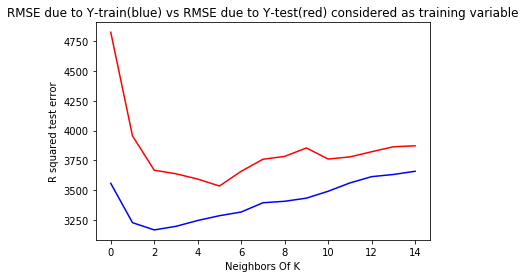

In [26]:
plt.plot(range(15),rmse_values,color='red')
plt.plot(range(15),rmse_values1,color='blue')
plt.xlabel('Neighbors Of K')
plt.ylabel('R squared test error')
plt.title('RMSE due to Y-train(blue) vs RMSE due to Y-test(red) considered as training variable', fontdict=None, loc='center', pad=None)

## From above graph we clearly when we use same values for both training and testing the errors are less compared to using diff values for training and testing

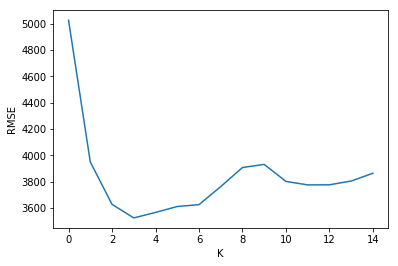

In [24]:
plt.xlabel('K')
plt.ylabel('RMSE')
plt.plot(range(15),rmse)
plt.show()


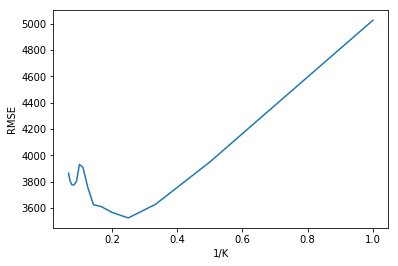

In [25]:
k1=[]
for k in range(15):
    k=k+1
    k1.append(1/k)
    
plt.xlabel('1/K')
plt.ylabel('RMSE')
plt.plot(k1,rmse)
plt.show()
   